
===== SENTIMENT VS TRADING PERFORMANCE =====

               Closed PnL                    is_win  Size USD pnl_to_size  \
                     mean median         sum   mean      mean        mean   
classification                                                              
Extreme Fear        0.000    0.0       0.000  0.000  2676.028       0.000   
Extreme Greed      83.038    0.0   20925.513  0.417  3514.431       0.038   
Fear              755.919    0.0  197294.936  0.429  3083.472       0.126   
Greed               0.000    0.0       0.000  0.000  2941.576       0.000   
Neutral             0.000    0.0       0.000  0.000  2863.688       0.000   

               Leverage  
                   mean  
classification           
Extreme Fear        NaN  
Extreme Greed       NaN  
Fear                NaN  
Greed               NaN  
Neutral             NaN  


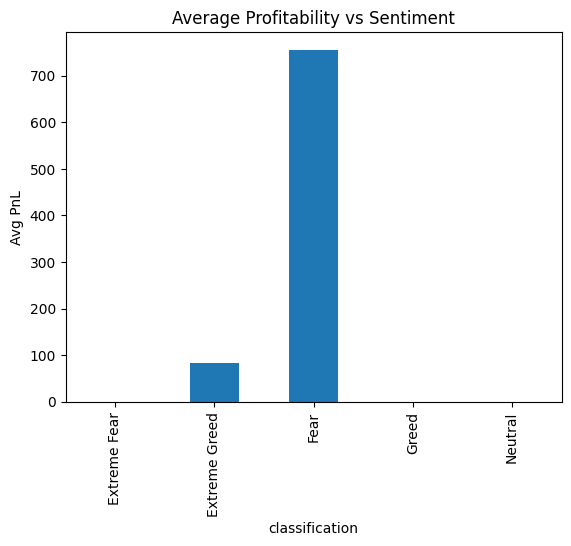

<Figure size 640x480 with 0 Axes>

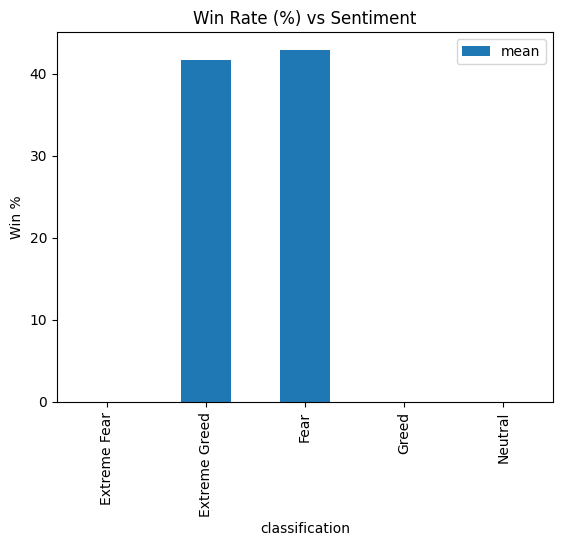

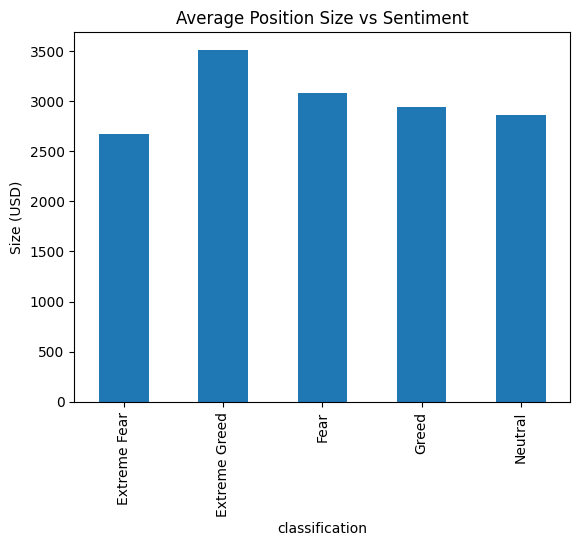


===== INSIGHT INTERPRETATION =====

• Highest profitability occurs during **Fear** periods.
• Lowest profitability occurs during **Extreme Fear** periods.
• Best win rate is also seen in **mean    Fear
dtype: object** market conditions.
• Traders take largest position sizes during **Extreme Greed** sentiment periods.

Recommendation: If profitability decreases while size or leverage increases in Greed phases → reduce risk during Greed.



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =======================
# 1) Load Data
# =======================
historical = pd.read_csv("historical_data.csv")
fear = pd.read_csv("fear_greed_index.csv")

# Convert timestamp → date
historical["date"] = pd.to_datetime(historical["Timestamp IST"], errors="coerce").dt.date
fear["date"] = pd.to_datetime(fear["date"], errors="coerce").dt.date

# Merge datasets
data = historical.merge(fear[["date","classification","value"]], on="date", how="left")

# =======================
# 2) Feature Engineering
# =======================
data["is_win"] = (data["Closed PnL"] > 0).astype(int)
data["pnl_to_size"] = data["Closed PnL"] / data["Size USD"]
if "Leverage" in data.columns:
    data["Leverage"] = pd.to_numeric(data["Leverage"], errors="coerce")
else:
    data["Leverage"] = np.nan  # Handle missing leverage gracefully

# =======================
# 3) Group Analysis
# =======================
summary = data.groupby("classification").agg({
    "Closed PnL": ["mean","median","sum"],
    "is_win": "mean",
    "Size USD": "mean",
    "pnl_to_size": "mean",
    "Leverage": "mean"
}).round(3)

print("\n===== SENTIMENT VS TRADING PERFORMANCE =====\n")
print(summary)

# =======================
# 4) Visualizations
# =======================
plt.figure()
summary["Closed PnL"]["mean"].plot(kind="bar")
plt.title("Average Profitability vs Sentiment")
plt.ylabel("Avg PnL")
plt.show()

plt.figure()
(summary["is_win"] * 100).plot(kind="bar")
plt.title("Win Rate (%) vs Sentiment")
plt.ylabel("Win %")
plt.show()

plt.figure()
summary["Size USD"]["mean"].plot(kind="bar")
plt.title("Average Position Size vs Sentiment")
plt.ylabel("Size (USD)")
plt.show()

if data["Leverage"].notna().any():
    plt.figure()
    summary["Leverage"]["mean"].plot(kind="bar")
    plt.title("Average Leverage vs Sentiment")
    plt.ylabel("Leverage (x)")
    plt.show()

# =======================
# 5) Key Insight Statements
# =======================
print("\n===== INSIGHT INTERPRETATION =====\n")

best_sentiment = summary["Closed PnL"]["mean"].idxmax()
worst_sentiment = summary["Closed PnL"]["mean"].idxmin()
win_best = (summary["is_win"]*100).idxmax()
size_high = summary["Size USD"]["mean"].idxmax()

print(f"• Highest profitability occurs during **{best_sentiment}** periods.")
print(f"• Lowest profitability occurs during **{worst_sentiment}** periods.")
print(f"• Best win rate is also seen in **{win_best}** market conditions.")
print(f"• Traders take largest position sizes during **{size_high}** sentiment periods.")

if data["Leverage"].notna().any():
    lev_high = summary["Leverage"]["mean"].idxmax()
    print(f"• Highest leverage usage is found in **{lev_high}** sentiment phases.")

print("\nRecommendation: If profitability decreases while size or leverage increases in Greed phases → reduce risk during Greed.\n")
